### Importing Necessary Libraries

In [1]:
import tensorflow as tf

In [2]:
from keras.preprocessing import image_dataset_from_directory
import pathlib
import random

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam 
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img

### Reading input data 

In [4]:
training_data_dir = pathlib.Path(r"Dataset/Train")
testing_data_dir = pathlib.Path(r"Dataset/Test")

In [5]:
image_count_train = len(list(training_data_dir.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(testing_data_dir.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Preparing the dataset

In [6]:
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)
channels = 3

In [7]:
train_ds = image_dataset_from_directory(training_data_dir,shuffle=True,validation_split=0.2,
                                        subset="training",seed=123,image_size = (img_height,img_width),batch_size = batch_size)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  testing_data_dir,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


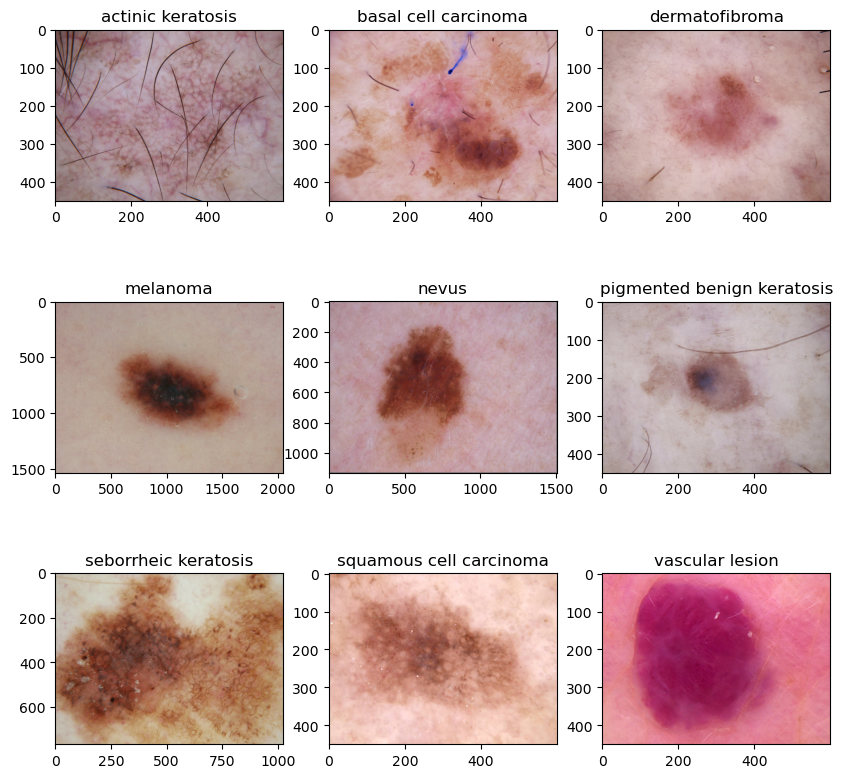

In [11]:
num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
    plt.subplot(3,3,i+1)
    image = img.imread(str(list(training_data_dir.glob(class_names[i]+'/*.jpg'))[1]))
    plt.title(class_names[i])
    plt.imshow(image)


In [12]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model 1 : Standard Model


In [14]:
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling \
                    (1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))


In [15]:
opt = Adam(lr=0.001)
model.compile(optimizer= opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

In [17]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25


C:\Users\ABILASH\anaconda3\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 62s 1s/step - loss: 2.0434 - accuracy: 0.1964 - val_loss: 2.0382 - val_accuracy: 0.2304
Epoch 2/25
56/56 [==============================] - 52s 918ms/step - loss: 1.9334 - accuracy: 0.2734 - val_loss: 1.9516 - val_accuracy: 0.2707
Epoch 3/25
56/56 [==============================] - 51s 921ms/step - loss: 1.7473 - accuracy: 0.3616 - val_loss: 1.6697 - val_accuracy: 0.4072
Epoch 4/25
56/56 [==============================] - 52s 922ms/step - loss: 1.6103 - accuracy: 0.4230 - val_loss: 1.5903 - val_accuracy: 0.4251
Epoch 5/25
56/56 [==============================] - 52s 925ms/step - loss: 1.5540 - accuracy: 0.4470 - val_loss: 1.4826 - val_accuracy: 0.4966
Epoch 6/25
56/56 [==============================] - 52s 931ms/step - loss: 1.4727 - accuracy: 0.4849 - val_loss: 1.4980 - val_accuracy: 0.4743
Epoch 7/25
56/56 [==============================] - 54s 957ms/step - loss: 1.3810 - accuracy: 0.5123 - val_loss: 1.4718 - val_accuracy: 0.4787
Epoch 8/25
56

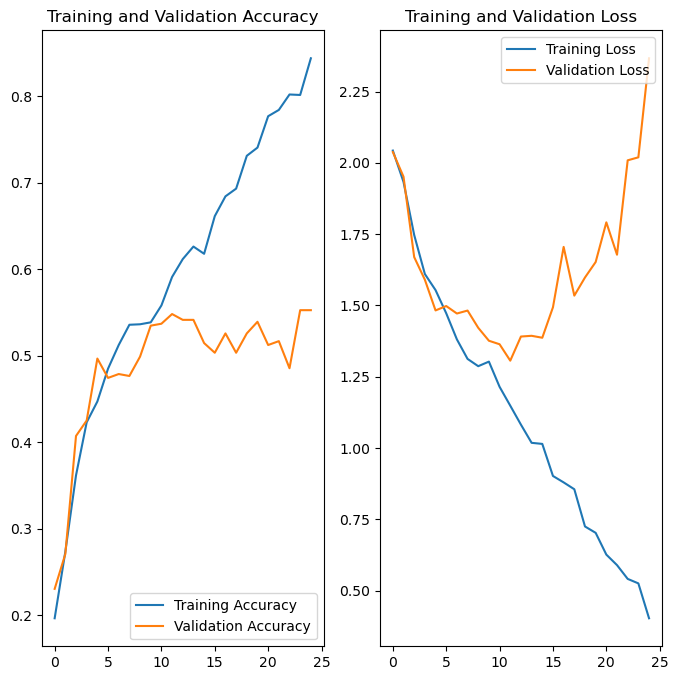

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Analysing the class imbalance of the data

In [26]:
import shutil

source_directory = "Dataset"
destination_directory = "Output"

shutil.copytree(source_directory,destination_directory)
print("Directory copied Sucessfully")

Directory copied Sucessfully


In [27]:
training_data_dir = pathlib.Path('Output\Train')

In [28]:
image_count = len(list(training_data_dir.glob('*/*.jpg')))

In [29]:
print(image_count)

2239


In [30]:
count = [] 
for name in class_names:
    count.append(len(list(training_data_dir.glob(name+'/*.jpg'))))

In [31]:
count

[114, 376, 95, 438, 357, 462, 77, 181, 139]

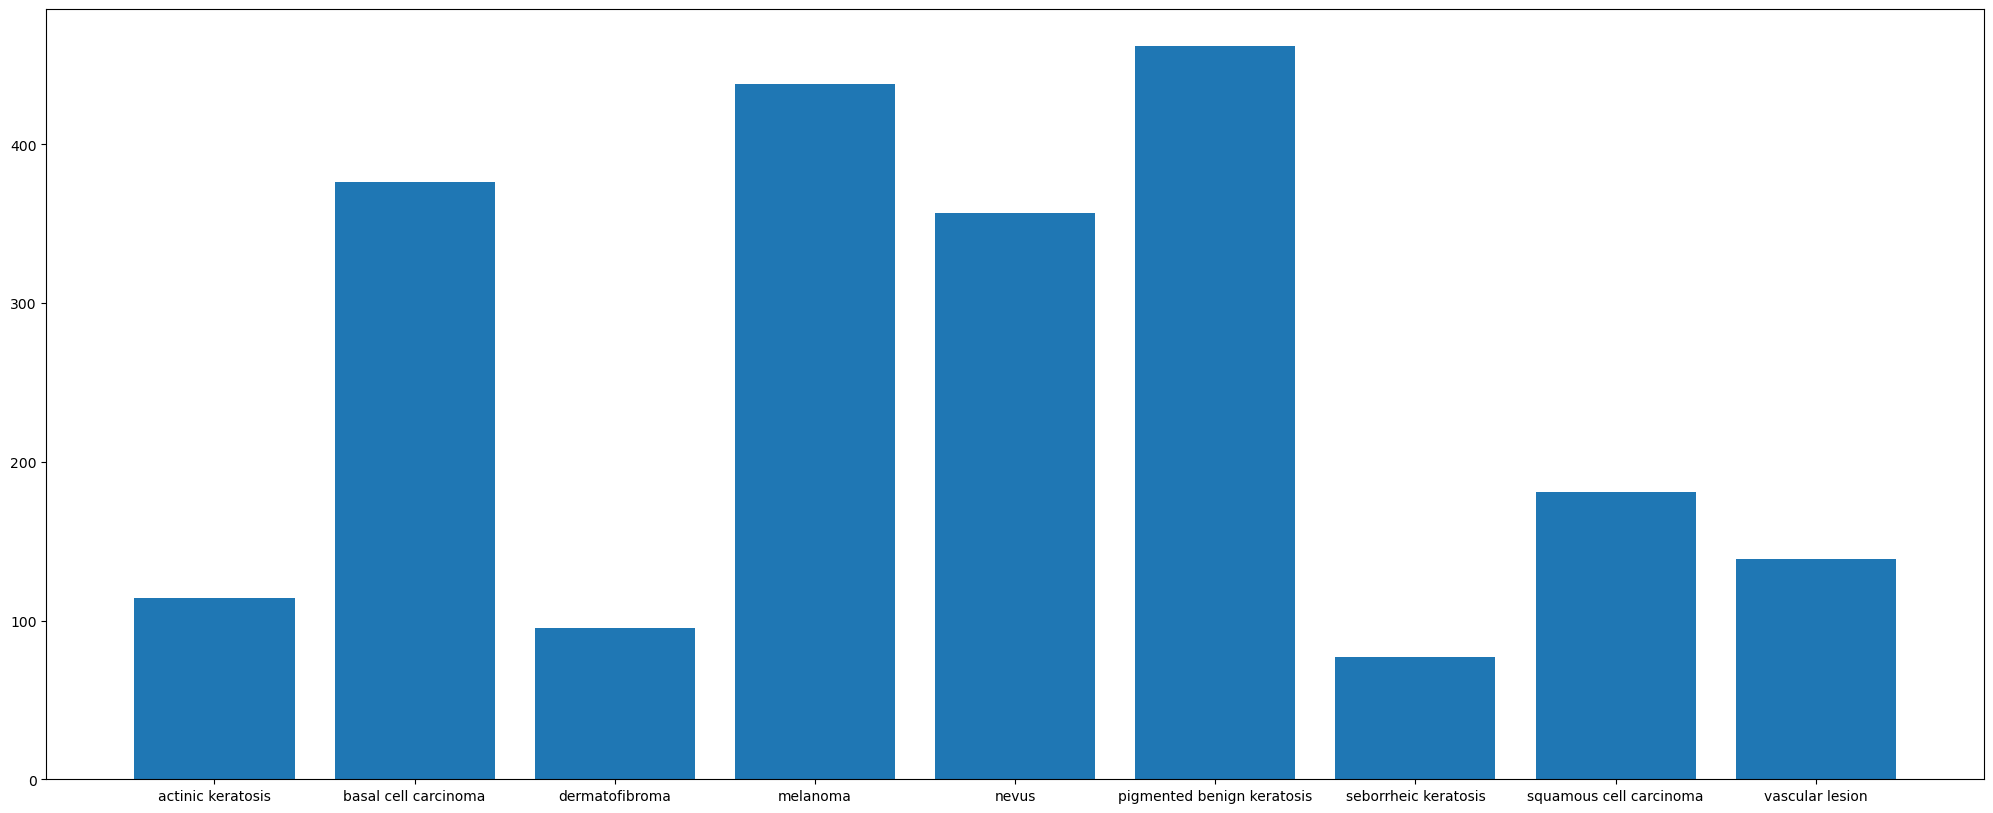

In [32]:
plt.figure(figsize=(25,10))
plt.bar(class_names,count)
plt.show()

In [33]:
import Augmentor

path_to_training_dataset = str(training_data_dir) + '/'

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation = 10)
    p.sample(1000)

Initialised with 114 image(s) found.
Output directory set to Output\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21D9630BC10>: 100%|█| 1000/1000 [00:04<00:00, 232.12 Sampl


Initialised with 376 image(s) found.
Output directory set to Output\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21D8CD1AF90>: 100%|█| 1000/1000 [00:04<00:00, 238.17 Sampl


Initialised with 95 image(s) found.
Output directory set to Output\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21D8CC9DE90>: 100%|█| 1000/1000 [00:04<00:00, 231.94 Sampl


Initialised with 438 image(s) found.
Output directory set to Output\Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x21D9637BED0>: 100%|█| 1000/1000 [00:21<


Initialised with 357 image(s) found.
Output directory set to Output\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x21D8CCF1C90>: 100%|█| 1000/1000 [00:18<00:00, 54.46 Samp


Initialised with 462 image(s) found.
Output directory set to Output\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21D89F6AA90>: 100%|█| 1000/1000 [00:04<00:00, 238.61 Sampl


Initialised with 77 image(s) found.
Output directory set to Output\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x21D8CCEC650>: 100%|█| 1000/1000 [00:09<00:00, 107.83 Samp


Initialised with 181 image(s) found.
Output directory set to Output\Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x21D8E79E3D0>: 100%|█| 1000/1000 [00:04<0


Initialised with 139 image(s) found.
Output directory set to Output\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21D8CCF0190>: 100%|█| 1000/1000 [00:04<00:00, 229.98 Sampl


In [35]:
image_count_train = len(list(training_data_dir.glob('*/output/*.jpg')))
print(image_count_train)

9000


<BarContainer object of 9 artists>

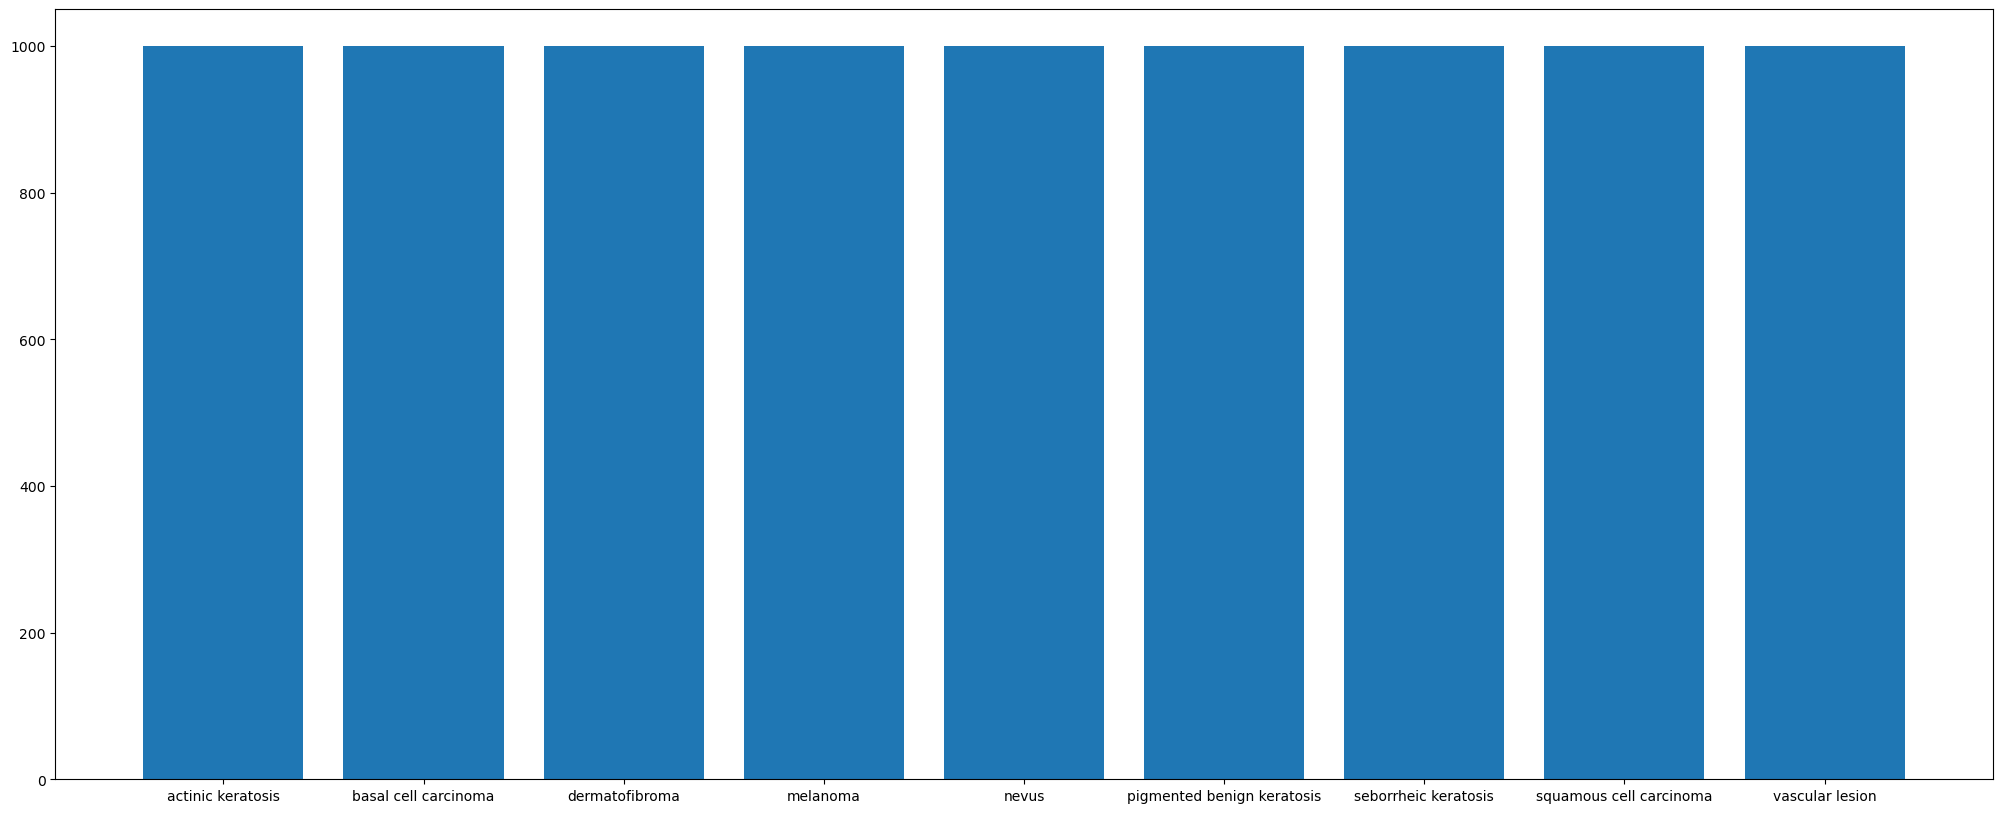

In [37]:
count = [] 
for name in class_names:
    count.append(len(list(training_data_dir.glob(name+'*/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [38]:
import os
from glob import glob

path_list_new  = [x for x in glob(os.path.join(training_data_dir, "*","output","*.jpg"))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) 
                   for y in glob(os.path.join(training_data_dir,"*","output","*.jpg"))]
df_dict_new = dict(zip(path_list_new,lesion_list_new))

In [39]:
path_list = []
lesion_list = []
for name in class_names:
    for file in training_data_dir.glob(name+'/*.jpg'):
        path_list.append(str(file))
        lesion_list.append(name)
df_dict_original = dict(zip(path_list,lesion_list))
original_df = pd.DataFrame(list(df_dict_original.items()),columns=['Path','Label'])

### Model 2 : Model with Class balance data.

In [40]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_data_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_data_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [42]:
print(train_ds.class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [43]:
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))


In [44]:
opt = Adam(lr=0.001)
model.compile(optimizer= opt,
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [45]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25


C:\Users\ABILASH\anaconda3\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


281/281 [==============================] - 291s 1s/step - loss: 1.8019 - accuracy: 0.2949 - val_loss: 1.6286 - val_accuracy: 0.3440
Epoch 2/25
281/281 [==============================] - 281s 999ms/step - loss: 1.4255 - accuracy: 0.4402 - val_loss: 1.2870 - val_accuracy: 0.5002
Epoch 3/25
281/281 [==============================] - 286s 1s/step - loss: 1.2482 - accuracy: 0.5178 - val_loss: 1.1942 - val_accuracy: 0.5256
Epoch 4/25
281/281 [==============================] - 295s 1s/step - loss: 1.0832 - accuracy: 0.5754 - val_loss: 0.9661 - val_accuracy: 0.6288
Epoch 5/25
281/281 [==============================] - 288s 1s/step - loss: 0.9142 - accuracy: 0.6447 - val_loss: 0.7868 - val_accuracy: 0.6894
Epoch 6/25
281/281 [==============================] - 296s 1s/step - loss: 0.7251 - accuracy: 0.7224 - val_loss: 0.7904 - val_accuracy: 0.6880
Epoch 7/25
281/281 [==============================] - 291s 1s/step - loss: 0.5772 - accuracy: 0.7776 - val_loss: 0.5469 - val_accuracy: 0.7891
Epoch 8

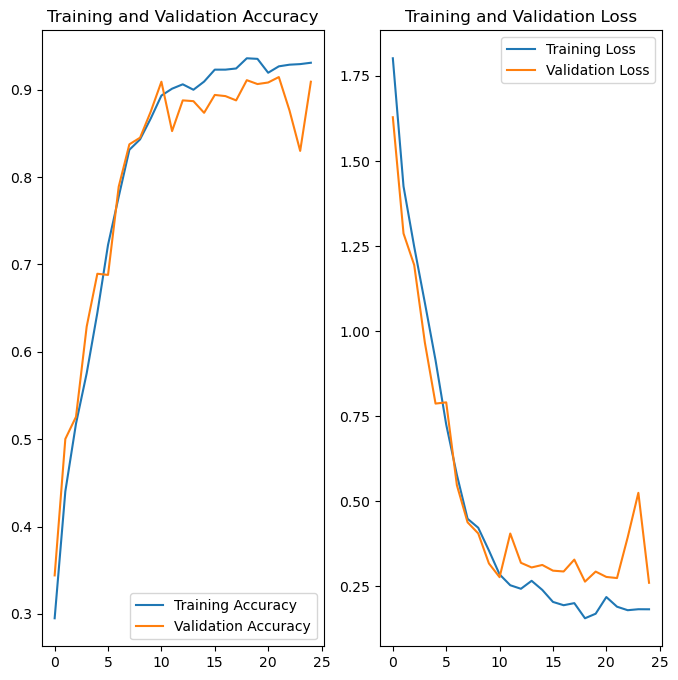

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Saving the model.

In [50]:
model.save("Melanoma_detection.h5")

C:\Users\ABILASH\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Evaluation of Model 

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.models import load_model


model = load_model("Melanoma_detection.h5",compile=False)
def get_predictions_and_labels(model, dataset):
    predictions = []
    true_labels = []
    for images, labels in dataset:
        predictions.extend(np.argmax(model.predict(images), axis=1))
        true_labels.extend(labels.numpy())
    return predictions, true_labels

test_predictions, test_true_labels = get_predictions_and_labels(model, test_ds)

conf_matrix = confusion_matrix(test_true_labels, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

acc_score = accuracy_score(test_true_labels, test_predictions)
print("\nAccuracy Score: {:.2f}%".format(acc_score * 100))

class_report = classification_report(test_true_labels, test_predictions, target_names=class_names)
print("\nClassification Report:")
print(class_report)


1/1 [==============================] - 0s 130ms/step
Confusion Matrix:
[[ 1  0  0  0 12  1  0  0  0]
 [ 3  9  0  0  0  2  0  1  0]
 [ 0  5  3  3  1  2  0  1  0]
 [ 0  0  0  2  8  3  0  0  0]
 [ 0  0  0  1 13  2  0  0  0]
 [ 0  2  2  1  1  5  0  1  0]
 [ 0  0  0  3  0  0  0  0  0]
 [ 0  2  2  3  1  4  0  4  0]
 [ 0  0  0  0  0  0  0  0  2]]

Accuracy Score: 36.79%

Classification Report:
                            precision    recall  f1-score   support

         actinic keratosis       0.25      0.07      0.11        14
      basal cell carcinoma       0.50      0.60      0.55        15
            dermatofibroma       0.43      0.20      0.27        15
                  melanoma       0.15      0.15      0.15        13
                     nevus       0.36      0.81      0.50        16
pigmented benign keratosis       0.26      0.42      0.32        12
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.57      0.25      0.35        

C:\Users\ABILASH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABILASH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABILASH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
